# Introduction

### Your description of the problem and the practical impacts of solving it.
With the rise of handwriting recognition features in mobile devices, letter recognition has become one of the major problems for classification models. In response to this trend, the project aims to solve three binary classification problems using UCI Machine Learning Repository's Letter Recognition dataset: H and K, M and Y, and O and C. The project will serve as a foundation for mutli-class classification with more letters. In a scale of mobile devices, we can already see many potential applications of the project: digital indexing of handwritten notes, language detection in photos, and handwritten math problem conversion to LaTex. In a larger scale, the project can be used for mail address recognition for postal services.

### What is the motivation for training and testing multiple classifiers? What factors should be considered in determining a classifier as the “best,” e.g. computational complexity, validation accuracy, model interpretability, etc.
Primary motivation for training and testing multiple classifiers is the difference in feature selection methods of each models. For instance, convolutional neural netowrk's feature extraction filter will perform feature extraction by building derived features, or by finding hidden features from an initial dataset while decision trees or random forest models intrinsically perform feature selections. Therefore, by training and testing classifiers with different feature selection methods, we can compare the efficiency of different models for the given problem. 
When evaluating a classifier, one of the most important criteria would be the accuracy of the model since accurate classification of the unseen data is the primary goal of classifiers. Other important factors also include low computation costs (i.e. few hyperparameters), easy interpretability, etc.
### What is the motivation for dimension reduction? Which methods are “better,” and what factors should be considered in determining a dimension reduction method as “good” or “bad.”
Motivations for dimension reduction include: lowering the computational cost of modeling, reducing the number of samples required to fit a model, and removal of uninformative or extra feature variables. No dimension reduction methods are inherently better than the others, but we can use different dimension reduction methods that best suits the problem we're trying to solve. For instance, simple quality filtering would be enough for the lunch data that we used in class instead of building a decision tree model. For determining whether a dimension reduction method is good or bad, the factors that should be considered include: interpretability, computational efficiency, information preservation, etc. 
### Brief description of the dimension reduction method(s) you chose.
Principal Component Analysis (PCA) was my first choice of dimension reduction method. PCA transforms high-dimensional data into a lower-dimensional representation while retaining as much of the original variability as possible. PCA achieves this by identifying the principal components, which are linear combinations of the original features.


### Speculate on the binary classification problems. Which pair of letters did you choose for the third problem? Which pair do you predict will be the easiest or hardest to classify?
I chose O and C for my third problem since I believe it would be one of the hardest binary classification problems using English alphabets due to the similar shape they hold. I believe the easiest pair out of the three pairs would be M and Y since they have almost no resemblance.

# 1. Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 


In [2]:
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 
  
# variable information 
print(letter_recognition.variables) 


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [3]:
display(y)
display(X)
data=pd.concat([X,y],axis=1)
display(data)

,lettr
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,D
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,C
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,T
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,S


In [4]:
# value count for each letter for extra credit
display(data['lettr'].value_counts())

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: lettr, dtype: int64

In [5]:
# variance of each feature
display(data.var())

/var/folders/7w/dj46r5ks7tsglt695mmbyhjr0000gn/T/ipykernel_5183/697179814.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(data.var())


x-box     3.660378
y-box    10.920086
width     4.058506
high      5.113887
onpix     4.798106
x-bar     4.104819
y-bar     5.407270
x2bar     7.289827
y2bar     5.668318
xybar     6.192507
x2ybr     6.922530
xy2br     4.328975
x-ege     5.440747
xegvy     2.392350
y-ege     6.589861
yegvx     2.616209
dtype: float64

# 1. H and K

## First Classification Method:  ANN
### Hyperparameter: learning rate
### Numerical values of learning rate: [0.001, 0.01, 0.1, 1, 10]

Accuracy for learning rate  0.001 :  0.9322033898305084
5fold cross validation scores for learning rate  0.001 :  [0.96271186 0.90847458 0.92881356 0.93537415 0.92176871]
Runtime for learning rate  0.001 :  249



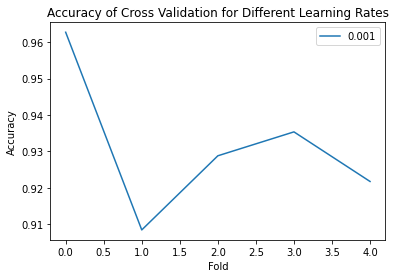

Accuracy for learning rate  0.01 :  0.9254237288135593
5fold cross validation scores for learning rate  0.01 :  [0.95932203 0.89830508 0.91525424 0.93197279 0.92176871]
Runtime for learning rate  0.01 :  71



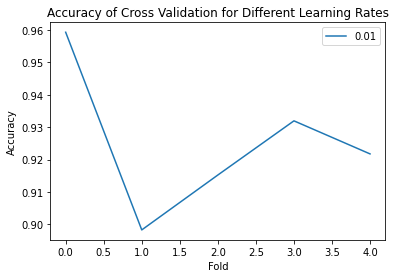

Accuracy for learning rate  0.1 :  0.46779661016949153
5fold cross validation scores for learning rate  0.1 :  [0.49830508 0.49830508 0.50169492 0.5        0.50340136]
Runtime for learning rate  0.1 :  16



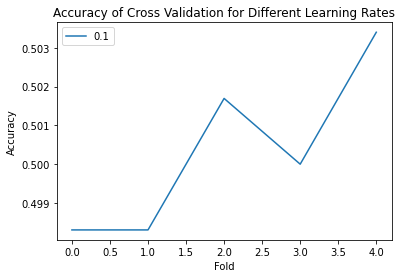

Accuracy for learning rate  1 :  0.46779661016949153
5fold cross validation scores for learning rate  1 :  [0.50169492 0.50169492 0.49830508 0.5        0.50340136]
Runtime for learning rate  1 :  13



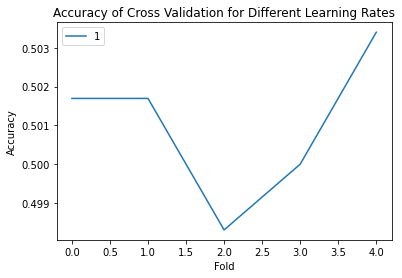

Accuracy for learning rate  10 :  0.46779661016949153
5fold cross validation scores for learning rate  10 :  [0.50169492 0.49830508 0.49830508 0.5        0.49659864]
Runtime for learning rate  10 :  12



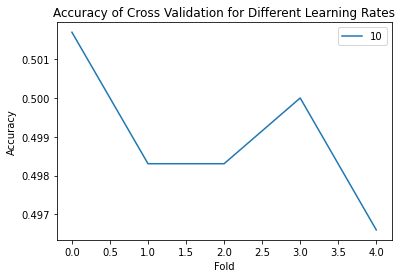

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import DataConversionWarning

# select rows with h and k from data['lettr']
data=pd.DataFrame(data)
data = data.loc[data['lettr'].isin(['H','K'])]

# split data into X and y
X = data.iloc[:,0:16]
y = data.iloc[:,16:17]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#ignore dataconversionwarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#test different learning rates
learning_rates = [0.001, 0.01, 0.1, 1, 10]
for i in learning_rates:
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, learning_rate_init=i, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for learning rate ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X, y, cv=5)
    print("5fold cross validation scores for learning rate ", i, ": ", scores)
    # print runtime
    print("Runtime for learning rate ", i, ": ", clf.n_iter_)
    print("")
    #plot accuracy of cross validation for each fold
    # show learning rate in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different Learning Rates Before Dimension Reduction")
    plt.show()


## Dimension Reduction using PCA


original shape:    (1473, 16)
transformed shape: (1473, 4)
explained variance ratio: [0.41099948 0.22671352 0.10926855 0.07312564]
sum of explained variance ratio: 0.8201071985580382
Accuracy for learning rate  0.001 :  0.8576271186440678
5fold cross validation scores for learning rate  0.001 :  [0.91525424 0.88135593 0.85084746 0.87755102 0.8707483 ]
Runtime for learning rate  0.001 :  399



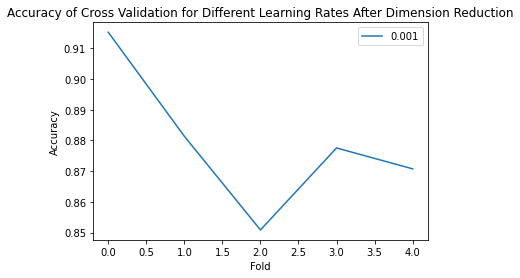

Accuracy for learning rate  0.01 :  0.864406779661017
5fold cross validation scores for learning rate  0.01 :  [0.9220339  0.87457627 0.84745763 0.86394558 0.87755102]
Runtime for learning rate  0.01 :  111



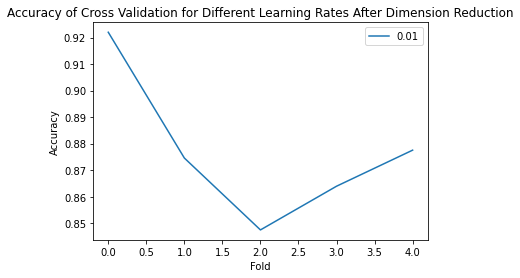

Accuracy for learning rate  0.1 :  0.8949152542372881
5fold cross validation scores for learning rate  0.1 :  [0.90847458 0.91186441 0.87457627 0.8877551  0.88095238]
Runtime for learning rate  0.1 :  90



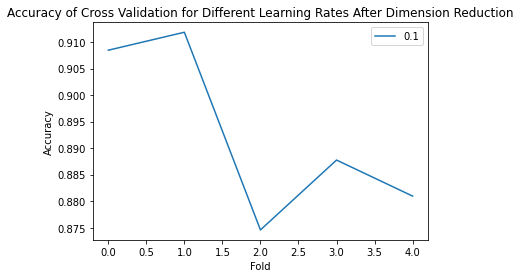

Accuracy for learning rate  1 :  0.4711864406779661
5fold cross validation scores for learning rate  1 :  [0.50169492 0.49830508 0.53559322 0.5        0.50340136]
Runtime for learning rate  1 :  17



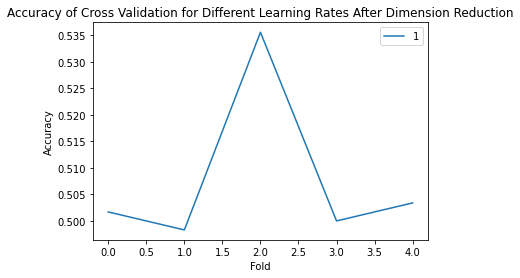

Accuracy for learning rate  10 :  0.5288135593220339
5fold cross validation scores for learning rate  10 :  [0.50169492 0.49830508 0.50169492 0.5        0.50340136]
Runtime for learning rate  10 :  22



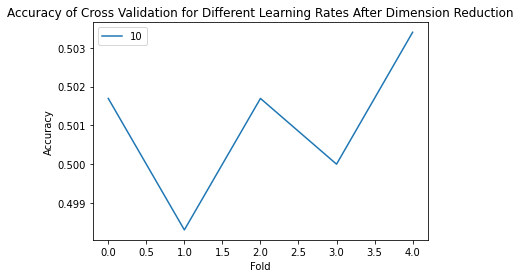

In [10]:
## PCA
## 4 features
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("sum of explained variance ratio:", sum(pca.explained_variance_ratio_))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

#test different learning rates
learning_rates = [0.001, 0.01, 0.1, 1, 10]
for i in learning_rates:
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, learning_rate_init=i, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for learning rate ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X_pca, y, cv=5)
    print("5fold cross validation scores for learning rate ", i, ": ", scores)
    # print runtime
    print("Runtime for learning rate ", i, ": ", clf.n_iter_)
    print("")
    #plot accuracy of cross validation for each fold
    # show learning rate in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different Learning Rates After Dimension Reduction")
    plt.show()


## Second Classification Method: kNN
### Hyperparameter: k
### k: 1, 5, 10, 15, 20

Accuracy for k =  1 :  0.9627118644067797
5fold cross validation scores for k =  1 :  [0.96610169 0.96949153 0.95932203 0.96938776 0.95238095]


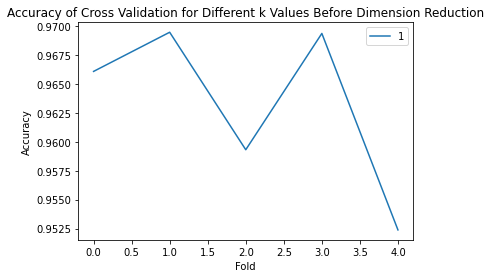

Accuracy for k =  10 :  0.9457627118644067
5fold cross validation scores for k =  10 :  [0.9559322  0.94576271 0.94237288 0.94557823 0.93537415]


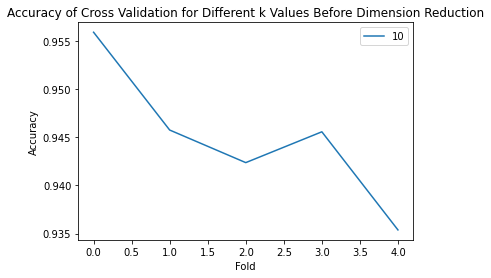

Accuracy for k =  15 :  0.9355932203389831
5fold cross validation scores for k =  15 :  [0.94237288 0.93559322 0.93220339 0.93197279 0.93197279]


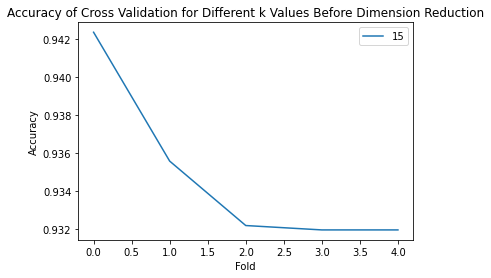

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#test different k values
k_values = [1, 5, 10, 15, 20]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for k = ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X, y, cv=5)
    print("5fold cross validation scores for k = ", i, ": ", scores)
    #plot accuracy of cross validation for each fold
    # show k in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different k Values Before Dimension Reduction")
    plt.show()

## Dimension reduction using PCA

original shape:    (1473, 16)
transformed shape: (1473, 4)
explained variance ratio: [0.41099948 0.22671352 0.10926855 0.07312564]
sum of explained variance ratio: 0.8201071985580036
Accuracy for k =  1 :  0.888135593220339
5fold cross validation scores for k =  1 :  [0.90847458 0.88813559 0.86101695 0.89115646 0.86394558]


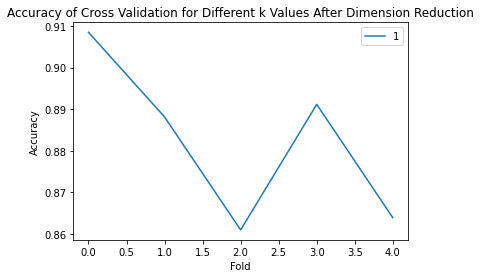

Accuracy for k =  10 :  0.888135593220339
5fold cross validation scores for k =  10 :  [0.91186441 0.89491525 0.89491525 0.9047619  0.88095238]


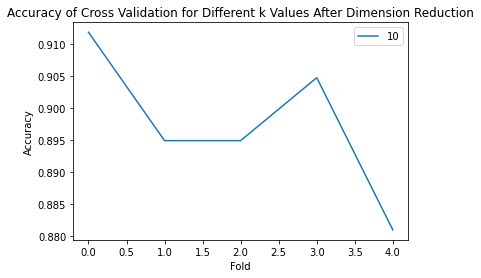

Accuracy for k =  15 :  0.8813559322033898
5fold cross validation scores for k =  15 :  [0.90508475 0.89491525 0.89491525 0.88095238 0.86054422]


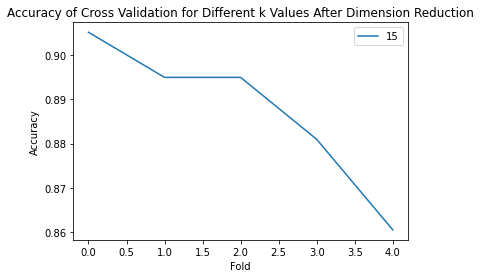

In [13]:
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("sum of explained variance ratio:", sum(pca.explained_variance_ratio_))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

#test different k values
k_values = [1, 5, 10, 15, 20]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for k = ", i, ": ", accuracy_score(y_test, y_pred))
    # 5fold cross validation
    scores = cross_val_score(clf, X_pca, y, cv=5)
    print("5fold cross validation scores for k = ", i, ": ", scores)
    #plot accuracy of cross validation for each fold
    # show k in the plot
    plt.plot(scores, label=i)
    plt.legend()
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Cross Validation for Different k Values After Dimension Reduction")
    plt.show()

# 2. M and Y

## First Classification Method:  ANN
### Hyperparameter: batch size
### Batch sizes: 

## Dimension Reduction using PCA


## Second Classification Method: kNN
### Hyperparameter: k
### k: 1, 5, 10, 15, 20

## Dimension Reduction using PCA

## 3. O and C

## First Classification Method:  ANN
### Hyperparameter: maximum number of iterations
### Number of iterations: 

## Dimension Reduction using PCA

## Second Classification Method: kNN
### Hyperparameter: k
### k: 1, 5, 10, 15, 20

## Dimension Reduction using PCA

# Results

## Brief description of the classifier and its general advantages and disadvantages.

## Figure: Graph the cross validation results (from fitting the classification model without dimension reduction) over the range of hyperparameter values you tested. There should be three sets of values, one for each binary classification problem.

Please refer to output of the graphs above.

## Figure: Graph the cross validation results (from fitting the classification model with dimension reduction) over the range of hyperparameter values you tested. There should be three sets of values, one for each binary classification problem.
Please refer to output of the graphs above.


# Discussion

## Compare the performance and run time of the different classifiers on the final validation sets with either a table or a figure.

## Compare the performance and run time of the different classifiers after dimension reduction on the final validation sets with either a table or a figure.

## Lessons learned: What model would you choose for this problem and why? How did dimension reduction effect the accuracy and/or run times of the different classifiers? What would you do differently if you were given this same task for a new dataset? Include at least one additional topic of discussion.